<br>
<center>
<img src="https://raw.githubusercontent.com/elaynelemos/prediction-of-orders-dmc/main/assets/img/univasf-logo.png" width=200>
<h3>
    UNIVERSIDADE FEDERAL DO VALE DO SÃO FRANCISCO
    <br>COLEGIADO DE ENGENHARIA DE COMPUTAÇÃO
</h3>

<h3>Orientador</h3>
<span>Prof. Dr. Rosalvo Ferreira de Oliveira Neto</span>

<h3>Discentes</h3>
<span>Anísio Pereira Batista Filho
<br>Edjair Aguiar Gomes Filho
<br>Elayne Rute Lessa Lemos</span>
</center>
<br><br>

## Regressão com Redes Neurais

Projeto em: [https://github.com/anisiobfilho/regression_neuralnetworks_univasf](https://github.com/anisiobfilho/regression_neuralnetworks_univasf)

### Importação das bases de dados

In [1]:
import pandas as pd

repo_url = 'https://raw.githubusercontent.com/anisiobfilho/regression_neuralnetworks_univasf/main'

In [2]:
X_train = pd.read_csv(f'{repo_url}/data/preprocessed/ic_house_pred_train_X.csv')
y_train = pd.read_csv(f'{repo_url}/data/preprocessed/ic_house_pred_train_y.csv')
y_train_log = pd.read_csv(f'{repo_url}/data/preprocessed/ic_house_pred_train_y_log.csv')

X_test = pd.read_csv(f'{repo_url}/data/preprocessed/ic_house_pred_test_X.csv')
y_test = pd.read_csv(f'{repo_url}/data/preprocessed/ic_house_pred_test_y.csv')
y_test_log = pd.read_csv(f'{repo_url}/data/preprocessed/ic_house_pred_test_y_log.csv')

In [3]:
X_train.sample(3)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,...,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageQual_ausente,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,GarageCond_ausente,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_ausente,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_ausente,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MiscFeature_ausente,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Condition2_PosA,Condition2_RRNn,Electrical_Mix,Exterior1st_ImStucc,RoofMatl_Membran
9,0.235294,0.270548,0.052593,0.666667,0.500,0.956522,0.916667,0.0,0.039334,0.0,0.329195,0.162193,0.150757,0.462954,0.0,0.303881,0.000000,0.0,0.666667,0.5,0.375,0.5,0.500000,0.333333,0.945455,0.5,0.478138,0.0,0.248629,0.000000,0.0,0.0,0.0,0.0,0.363636,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
446,0.176471,0.205479,0.066807,0.666667,0.375,0.586957,0.050000,0.0,0.106839,0.0,0.300086,0.213421,0.222579,0.476029,0.0,0.367935,0.000000,0.0,0.666667,0.0,0.375,0.5,0.416667,0.333333,0.481818,0.5,0.470381,0.0,0.038391,0.206522,0.0,0.0,0.0,0.0,0.545455,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
58,0.235294,0.188356,0.041328,0.666667,0.500,0.956522,0.900000,0.0,0.116230,0.0,0.128425,0.156465,0.142726,0.546247,0.0,0.329691,0.333333,0.0,0.666667,0.5,0.500,0.5,0.500000,0.000000,0.945455,0.5,0.435825,0.0,0.082267,0.000000,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# Converte em aray numpy a variável alvo
y_train = y_train.SalePrice.to_numpy()
y_train_log = y_train_log.SalePrice.to_numpy()

y_test = y_test.SalePrice.to_numpy()
y_test_log = y_test_log.SalePrice.to_numpy()

### Treinamento dos modelos

In [5]:
from keras.models  import Sequential
from keras.layers import InputLayer, Dense
from tensorflow.keras.optimizers import Adam

def create_model(features, hidden, learning_rate):
    input_neuron, hidden_neuron, output_neuron = features, hidden, 1

    model = Sequential([     
        InputLayer(input_neuron),
        Dense(hidden_neuron, activation="relu"),
        Dense(output_neuron, activation="sigmoid")
    ])

    print(f'Learning Rate = {learning_rate}\nNeurônios na camada escondida = {hidden}')
    print(model.summary(),'\n\n')

    opt = Adam(learning_rate=learning_rate)
    model.compile(optimizer=opt, loss="mse")

    return model

#### Estabelecimento de parâmetros variáveis

In [6]:
hidden_layer_sizes = [int(X_train.shape[-1]**(1/4)), int(X_train.shape[-1]**(1/2)), 100]
learning_rates = [0.01, 0.4, 0.1]

combined_parameters = [ 
    {'lr': learning_rate, 'hidden_neurons': hidden} \
        for hidden in hidden_layer_sizes for learning_rate in learning_rates
]
combined_parameters

[{'hidden_neurons': 4, 'lr': 0.01},
 {'hidden_neurons': 4, 'lr': 0.4},
 {'hidden_neurons': 4, 'lr': 0.1},
 {'hidden_neurons': 16, 'lr': 0.01},
 {'hidden_neurons': 16, 'lr': 0.4},
 {'hidden_neurons': 16, 'lr': 0.1},
 {'hidden_neurons': 100, 'lr': 0.01},
 {'hidden_neurons': 100, 'lr': 0.4},
 {'hidden_neurons': 100, 'lr': 0.1}]

#### Com variável alvo sem transformação

In [7]:
models = {
  (item['lr'], item['hidden_neurons']): create_model(X_train.shape[-1], item['hidden_neurons'], item['lr']) \
      for item in combined_parameters
}

Learning Rate = 0.01
Neurônios na camada escondida = 4
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 1048      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 1,053
Trainable params: 1,053
Non-trainable params: 0
_________________________________________________________________
None 


Learning Rate = 0.4
Neurônios na camada escondida = 4
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 4)                 1048      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 1,053
Trainable params: 1,053
Non

In [8]:
batch_size = 32
epochs = 200
Log = {}

for pair in models.keys():
    print(f'Treinando com:\nLearning Rate = {pair[0]}\nNeurônios na camada escondida = {pair[1]}\n')
    Log[pair] = models[pair].fit(X_train, y_train, batch_size=batch_size, epochs=epochs)
    print('\n\n')

Treinando com:
Learning Rate = 0.01
Neurônios na camada escondida = 4

Epoch 1/200
32/32 [==============================] - 0s 2ms/step - loss: 38892544000.0000
Epoch 2/200
32/32 [==============================] - 0s 1ms/step - loss: 38892503040.0000
Epoch 3/200
32/32 [==============================] - 0s 1ms/step - loss: 38892503040.0000
Epoch 4/200
32/32 [==============================] - 0s 1ms/step - loss: 38892503040.0000
Epoch 5/200
32/32 [==============================] - 0s 2ms/step - loss: 38892498944.0000
Epoch 6/200
32/32 [==============================] - 0s 1ms/step - loss: 38892507136.0000
Epoch 7/200
32/32 [==============================] - 0s 1ms/step - loss: 38892507136.0000
Epoch 8/200
32/32 [==============================] - 0s 1ms/step - loss: 38892503040.0000
Epoch 9/200
32/32 [==============================] - 0s 2ms/step - loss: 38892503040.0000
Epoch 10/200
32/32 [==============================] - 0s 1ms/step - loss: 38892503040.0000
Epoch 11/200
32/32 [========

### Medidas de Desempenho
Para este projeto de regressão, utilizou-se:
- **r2_score**(y_test, y_pred)

- **median_absolute_error**(y_test, y_pred)

- **Gráfico de Dispersão**

In [9]:
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import median_absolute_error, r2_score
import numpy as np

def plot_target_metricts(mlp, X_test, y_test, transformed=False):
  y_pred = np.expm1(mlp.predict(X_test)) if transformed else mlp.predict(X_test)
  y_pred = y_pred.flatten()
  print(np.random.choice(y_pred, size=10, replace=False))

  r2 = r2_score(y_test, y_pred)

  mae = median_absolute_error(y_test, y_pred)

  # Plot results
  ax = plt.axes()

  ax.scatter(y_test, y_pred)
  ax.plot([0, 80000], [-10000, 80000], '--k')
  ax.set_ylabel('Target predicted')
  ax.set_xlabel('True Target')
  ax.set_title('Sem transformação logarítmica do alvo')
  ax.text(10000, 70000, r'$R^2$=%.2f, MAE=%.2f' % (
      r2, mae))
  ax.set_xlim([0, 80000])
  ax.set_ylim([-10000, 80000])

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()


[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()


[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()


[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()


[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


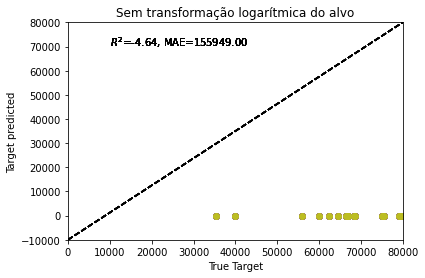

In [11]:
for pair in models.keys():
    plot_target_metricts(models[pair], X_test, y_test)

#### Comparação da distribuição com e sem a transformação logarítmica

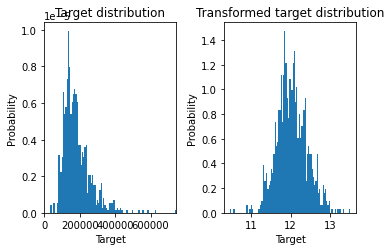

In [12]:
f, (ax0, ax1) = plt.subplots(1, 2)

ax0.hist(y_train, bins=100, density=True)
ax0.set_xlim([0, max(y_train)])
ax0.set_ylabel('Probability')
ax0.set_xlabel('Target')
ax0.set_title('Target distribution')

ax1.hist(y_train_log, bins=100, density=True)
ax1.set_ylabel('Probability')
ax1.set_xlabel('Target')
ax1.set_title('Transformed target distribution')

f.tight_layout(rect=[0.05, 0.05, 0.95, 0.95])


#### Treinamento com variável alvo com transformação logarítmica

In [14]:
for pair in models.keys():
    print(f'Treinando com:\nLearning Rate = {pair[0]}\nNeurônios na camada escondida = {pair[1]}')
    Log[pair] = models[pair].fit(X_train, y_train_log, batch_size=batch_size, epochs=epochs)

Treinando com:
Learning Rate = 0.01
Neurônios na camada escondida = 4
Epoch 1/200
32/32 [==============================] - 0s 2ms/step - loss: 121.7915
Epoch 2/200
32/32 [==============================] - 0s 2ms/step - loss: 121.7915
Epoch 3/200
32/32 [==============================] - 0s 2ms/step - loss: 121.7915
Epoch 4/200
32/32 [==============================] - 0s 2ms/step - loss: 121.7915
Epoch 5/200
32/32 [==============================] - 0s 2ms/step - loss: 121.7915
Epoch 6/200
32/32 [==============================] - 0s 2ms/step - loss: 121.7915
Epoch 7/200
32/32 [==============================] - 0s 2ms/step - loss: 121.7915
Epoch 8/200
32/32 [==============================] - 0s 2ms/step - loss: 121.7915
Epoch 9/200
32/32 [==============================] - 0s 2ms/step - loss: 121.7915
Epoch 10/200
32/32 [==============================] - 0s 2ms/step - loss: 121.7915
Epoch 11/200
32/32 [==============================] - 0s 2ms/step - loss: 121.7915
Epoch 12/200
32/32 [======

[1.7182817 1.7182817 1.7182817 1.7182817 1.7182817 1.7182817 1.7182817
 1.7182817 1.7182817 1.7182817]
[1.7182817 1.7182817 1.7182817 1.7182817 1.7182817 1.7182817 1.7182817
 1.7182817 1.7182817 1.7182817]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()


[1.7182817 1.7182817 1.7182817 1.7182817 1.7182817 1.7182817 1.7182817
 1.7182817 1.7182817 1.7182817]
[1.7182817 1.7182817 1.7182817 1.7182817 1.7182817 1.7182817 1.7182817
 1.7182817 1.7182817 1.7182817]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()


[1.7182817 1.7182817 1.7182817 1.7182817 1.7182817 1.7182817 1.7182817
 1.7182817 1.7182817 1.7182817]
[1.7182817 1.7182817 1.7182817 1.7182817 1.7182817 1.7182817 1.7182817
 1.7182817 1.7182817 1.7182817]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()


[1.7182817 1.7182817 1.7182817 1.7182817 1.7182817 1.7182817 1.7182817
 1.7182817 1.7182817 1.7182817]
[1.7182817 1.7182817 1.7182817 1.7182817 1.7182817 1.7182817 1.7182817
 1.7182817 1.7182817 1.7182817]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()


[1.7182817 1.7182817 1.7182817 1.7182817 1.7182817 1.7182817 1.7182817
 1.7182817 1.7182817 1.7182817]


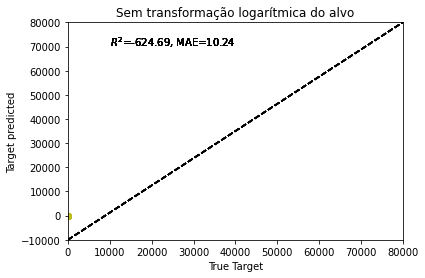

In [17]:
for pair in models.keys():
    plot_target_metricts(models[pair], X_test, y_test_log, transformed=True)